In [38]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [39]:
X, y  = make_classification(n_samples=1000, n_classes=2, random_state=42)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

In [41]:
# dummy model, 0 as default value
dummy_model_probs = [0 for _ in range(len(y_test))]

In [45]:
# Create a Basic model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
model_probs = model.predict_proba(X_test)

In [74]:
model_probs = model_probs[:, 1]

In [61]:
dummy_model_auc = roc_auc_score(y_test, dummy_model_probs)
model_auc = roc_auc_score(y_test, model_probs)

In [62]:
print('Dummy Model: ROC AUC=%.3f' % dummy_model_auc)
print('Logistic Model: ROC AUC=%.3f' % model_auc)

Dummy Model: ROC AUC=0.500
Logistic Model: ROC AUC=0.924


In [63]:
dummy_model_fpr, dummy_model_tpr, _ = roc_curve(y_test, dummy_model_probs)

In [73]:
model_fpr, model_tpr, threshold = roc_curve(y_test, model_probs)

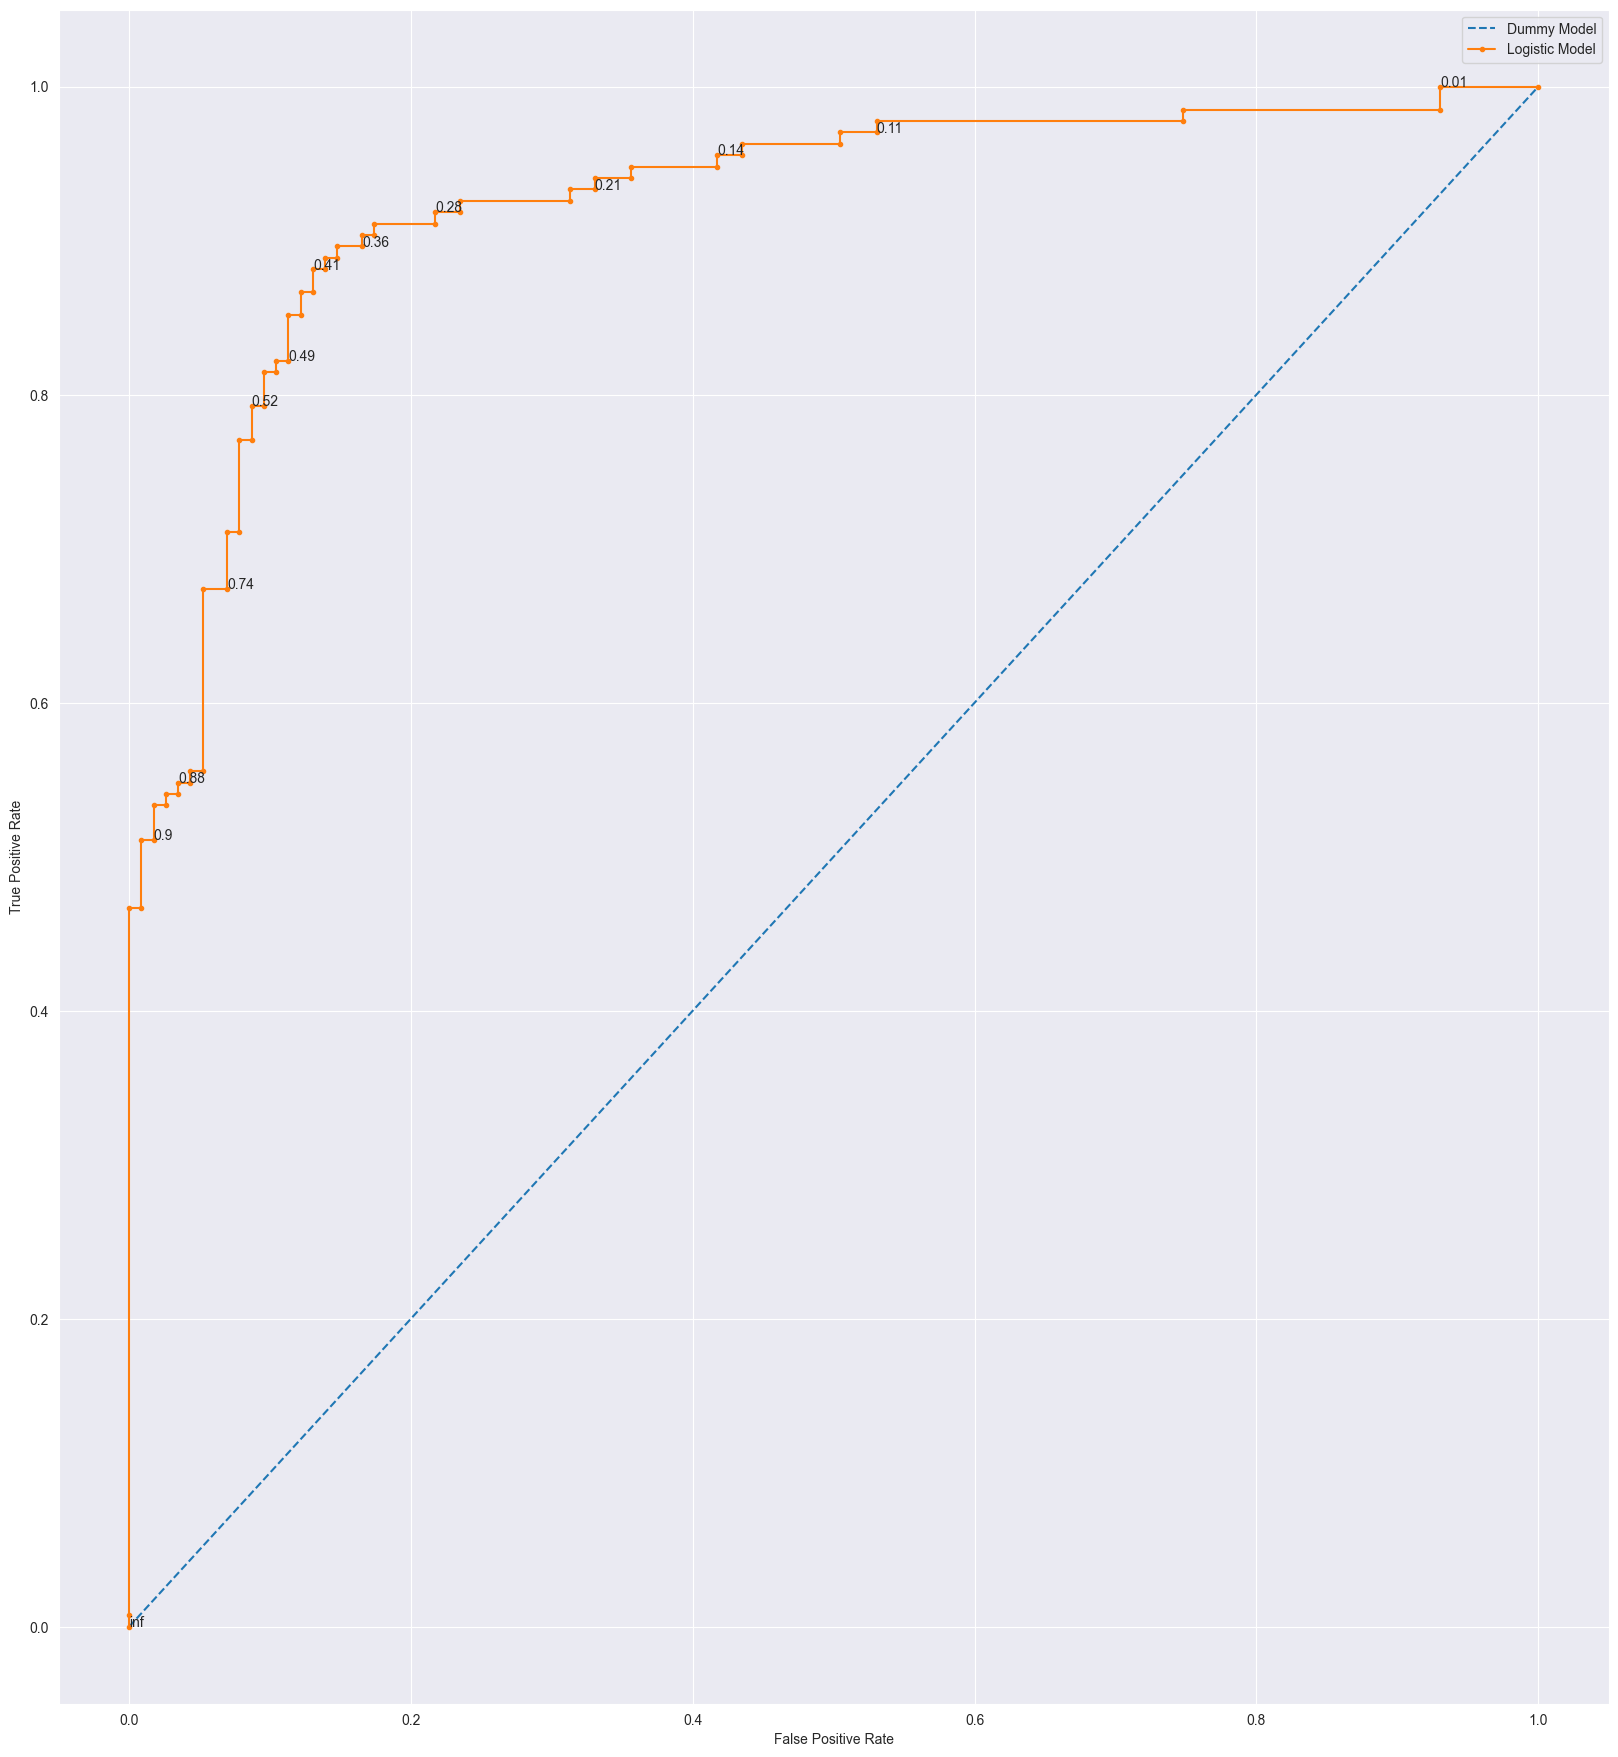

In [84]:
# plotting the threshold
import numpy as np

# Create figure and axes objects first
fig, ax = plt.subplots(figsize=(20, 22))

# Use the 'ax' object for all plotting
ax.plot(dummy_model_fpr, dummy_model_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic Model')

# Annotate the points for the logistic model
for i, txt in enumerate(threshold):
    # Annotate every 5th point to avoid clutter
    if i % 5 == 0:
        ax.annotate(np.round(txt, 2), (model_fpr[i], model_tpr[i]))

# Set labels and legend on the 'ax' object
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
plt.show()

In [85]:
chosen_threshold = 0.36
y_pred_specific = (model_probs >= chosen_threshold).astype(int)
y_pred_specific

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0])

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_specific))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       115
           1       0.87      0.90      0.88       135

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



In [87]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       115
           1       0.91      0.81      0.85       135

    accuracy                           0.85       250
   macro avg       0.85      0.86      0.85       250
weighted avg       0.86      0.85      0.85       250

